In [181]:
import numpy as np
import scipy.io
from scipy.io import loadmat
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

In [162]:
#loading mat file
mat = scipy.io.loadmat('hw02_dataset.mat')

In [163]:
#creating dictionary to store values of train and test data
train_data = {'x':[], 'y':[], 'label':[]}
test_data = {'x':[], 'y':[], 'label':[]}

#checking all keys of mat file and mapping to dictionary
for key in mat:
    if(key=='X_trn'):
        for data in mat[key]:
            train_data['x'].append(data[0])
            train_data['y'].append(data[1])
    elif(key=='X_tst'):
        for data in mat[key]:
            test_data['x'].append(data[0])
            test_data['y'].append(data[1])
    elif(key=='Y_trn'):
        for data in mat[key]:
            train_data['label'].append(data[0])
    elif(key=='Y_tst'):
        for data in mat[key]:
            test_data['label'].append(data[0])
            
#converting dictionaries to pandas dataframe for easier access            
train = pd.DataFrame(data = train_data)
test = pd.DataFrame(data = test_data)

In [164]:
# pqr=pd.Series(mat)
# pd.DataFrame({'Key':pqr.index, 'Data':pqr.values})

In [165]:
print(train.head())

          x         y  label
0 -0.219607  1.941066      0
1 -0.456096  2.238609      0
2 -0.130347  2.342862      0
3 -0.699596  2.321811      0
4 -1.180585  1.787855      0


In [166]:
# x values corresponding to class 0
class_0 = train[train.label==0]
print(class_0.head())

          x         y  label
0 -0.219607  1.941066      0
1 -0.456096  2.238609      0
2 -0.130347  2.342862      0
3 -0.699596  2.321811      0
4 -1.180585  1.787855      0


In [167]:
# x values corresponding to class 1
class_1 = train[train.label==1]
print(class_1.head())

           x         y  label
63 -0.005963  1.067942      1
64  1.196223  1.536610      1
65  1.539176  0.893028      1
66  0.828762  1.039379      1
67  0.813011  1.116846      1


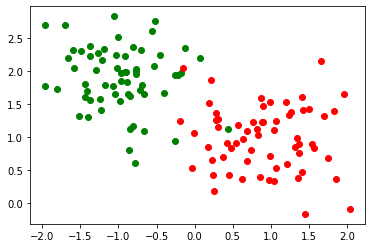

In [168]:
#scatter plot of of class 0 and class 1 coordinates
plt.scatter(class_0['x'], class_0['y'], color = "green")
plt.scatter(class_1['x'], class_1['y'], color = "red")

In [169]:
#splitting training data with 80-20 split
train_split, test_split = train_test_split(train, test_size=0.2)
model = LogisticRegression()
model.fit(train_split[['x','y']],train_split['label'])

LogisticRegression()

In [170]:
print(train_split.head())

           x         y  label
64  1.196223  1.536610      1
2  -0.130347  2.342862      0
32 -0.984424  1.547017      0
80  1.702546  1.322872      1
91  0.308884  1.157568      1


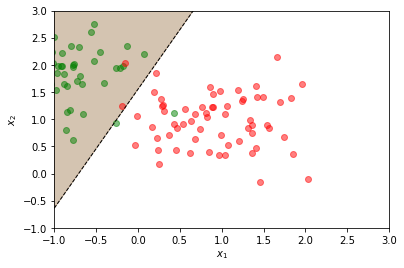

In [171]:
# model parameters
b = model.intercept_[0]
coeff_1, coeff_2 = model.coef_.T
# calculat slope and constant
#intercept and gradient of the decision boundary.
c = -b/coeff_2
m = -coeff_1/coeff_2

# Decision boundary plot along with scatter of original points
x = np.array([-1, 3])
y = m*x + c
plt.plot(x, y, 'k', lw=1, ls='--')
plt.fill_between(x, y, 3, color='tab:green', alpha=0.2)
plt.fill_between(x, y, 3, color='tab:red', alpha=0.2)
plt.scatter(class_0['x'],class_0['y'], color='green', alpha=0.5)
plt.scatter(class_1['x'],class_1['y'], color='red', alpha=0.5)
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()

In [184]:
#training classification accuracy
val_train = train.iloc[:, :2].values
class_train = train.iloc[:,2].values
class_pred=model.predict(val_train)
ac = metrics.accuracy_score(class_train, class_pred)
er = mean_squared_error(class_train, class_pred)
print("Accuracy for Train data: is {}%".format(ac*100))
print("Error for Test Train: is {}%".format(er*100))
# print(class_train)

Accuracy for Test data: is 96.82539682539682%
Error for Test data: is 3.1746031746031744%


In [173]:
print(val_test)

[[-0.21960675  1.94106602]
 [-0.45609595  2.23860914]
 [-0.13034716  2.34286249]
 [-0.69959617  2.32181115]
 [-1.18058501  1.78785494]
 [-0.78022195  0.61034117]
 [-1.24254811  1.57962629]
 [-0.25822186  0.93823088]
 [-0.69059205  1.79145031]
 [-1.05495953  2.82363367]
 [-0.7655312   2.02147539]
 [-1.21219725  2.16749563]
 [-1.3729345   1.56071758]
 [-1.39594678  1.30831083]
 [-0.55621279  2.60261623]
 [-0.77021839  1.99812826]
 [-1.95820693  1.77380467]
 [-0.40320066  1.66267022]
 [-1.44186703  1.6057867 ]
 [-0.17345247  1.97140121]
 [-0.81170653  1.16854396]
 [-1.59775015  2.31263631]
 [-1.95841726  2.68696191]
 [-0.90749799  1.97681873]
 [-0.80568541  2.35285039]
 [-1.37873673  2.22854487]
 [-1.29623358  2.01173031]
 [-1.80293458  1.72936336]
 [-0.96189152  1.84663797]
 [-0.90936488  2.22464764]
 [ 0.07079506  2.19649402]
 [-0.86176261  0.81029941]
 [-0.98442379  1.54701666]
 [-1.06976803  1.77872591]
 [-0.91534712  1.98323069]
 [-0.84762976  1.12652755]
 [-1.37862942  2.36866915]
 

In [183]:
#testing classification accuracy
val_test = test.iloc[:, :2].values
class_test = test.iloc[:,2].values
class_pred=model.predict(val_test)
a = metrics.accuracy_score(class_test, class_pred)
e = mean_squared_error(class_test, class_pred)
print("Accuracy for Test data: is {}%".format(a*100))
print("Error for Test data: is {}%".format(e*100))

# print(class_test)

Accuracy for Test data: is 92.85714285714286%
Error for Test data: is 7.142857142857142%
